In [4]:
# A notebook for simple lstm exploration
# Case of single lstm cell
from peratouch.core_funcs import Data, Trainer, plot_train, test_accuracy
from peratouch.networks import lstm
from peratouch.config import datapath_five_users

input_size = 8
D = Data(datapath_five_users, triggers=True, releases=False)
D.split()
D.normalize()
D.reshape_for_lstm(input_size=input_size, sliding=False)
D.tensors_to_device()
D.print_shapes()

Train, test and validation data normalized to:
[1.]
[0.99839183]
[1.00500158]
Using Device:  cpu , dtype:  torch.float32

Raw data shape:  (31090, 1, 32) 
Labels shape:  (31090,) 
Unique labels:  [0 1 2 3 4] 
Shape of test set: (4664, 4, 8) 
Shape of train set: (22462, 4, 8) 
Shape of validation set: (3964, 4, 8) 
Fraction of single class in test set:  0.2388507718696398 
dtype of inputs:  torch.float32


End of epoch 1:loss_tr=1.539, loss_val=1.539, train=32.8%, val=33.2%
End of epoch 2:loss_tr=1.393, loss_val=1.391, train=42.8%, val=43.3%
End of epoch 3:loss_tr=1.266, loss_val=1.262, train=47.2%, val=47.6%
End of epoch 4:loss_tr=1.250, loss_val=1.243, train=47.3%, val=47.5%
End of epoch 5:loss_tr=1.189, loss_val=1.189, train=50.1%, val=50.2%
End of epoch 6:loss_tr=1.197, loss_val=1.198, train=49.2%, val=49.3%
End of epoch 7:loss_tr=1.191, loss_val=1.194, train=49.5%, val=49.9%
End of epoch 8:loss_tr=1.170, loss_val=1.165, train=50.2%, val=50.8%
End of epoch 9:loss_tr=1.179, loss_val=1.174, train=50.5%, val=51.3%
End of epoch 10:loss_tr=1.156, loss_val=1.155, train=50.5%, val=51.6%
End of epoch 11:loss_tr=1.208, loss_val=1.198, train=48.5%, val=48.5%
End of epoch 12:loss_tr=1.135, loss_val=1.133, train=52.8%, val=53.6%
End of epoch 13:loss_tr=1.129, loss_val=1.127, train=53.4%, val=53.5%
End of epoch 14:loss_tr=1.118, loss_val=1.117, train=53.3%, val=54.3%
End of epoch 15:loss_tr=1.126

End of epoch 118:loss_tr=0.947, loss_val=0.951, train=61.2%, val=60.7%
End of epoch 119:loss_tr=0.964, loss_val=0.968, train=60.7%, val=60.9%
End of epoch 120:loss_tr=0.918, loss_val=0.926, train=64.0%, val=63.3%
End of epoch 121:loss_tr=0.923, loss_val=0.925, train=63.4%, val=63.0%
End of epoch 122:loss_tr=0.915, loss_val=0.922, train=64.0%, val=63.1%
End of epoch 123:loss_tr=0.927, loss_val=0.932, train=62.8%, val=62.2%
End of epoch 124:loss_tr=0.925, loss_val=0.927, train=63.3%, val=63.1%
End of epoch 125:loss_tr=0.935, loss_val=0.933, train=62.5%, val=62.4%
End of epoch 126:loss_tr=0.944, loss_val=0.950, train=62.9%, val=62.4%
End of epoch 127:loss_tr=0.940, loss_val=0.940, train=61.4%, val=61.0%
End of epoch 128:loss_tr=0.938, loss_val=0.939, train=61.6%, val=61.2%
End of epoch 129:loss_tr=0.921, loss_val=0.932, train=63.6%, val=63.5%
End of epoch 130:loss_tr=0.910, loss_val=0.916, train=64.3%, val=63.6%
End of epoch 131:loss_tr=0.913, loss_val=0.921, train=64.1%, val=63.7%
End of

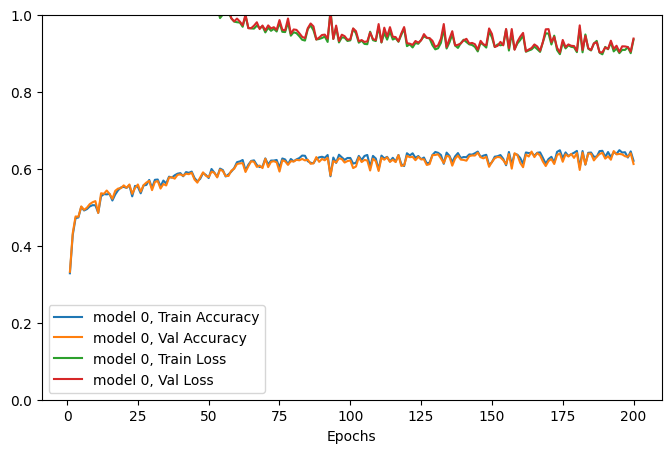

In [5]:
model = lstm(input_size=input_size, hidden_size=16, out_size=5, global_pool=True) 
T = Trainer(D)
T.setup(model, learning_rate=1e-2, weight_decay=1e-3, batch_size=2*256, max_epochs=200, verbose=True)
T.train_model(model)

plot_train([T])
test_accuracy([D], [model])

In [1]:
# Look at 3 triggers
from peratouch.core_funcs import Data, Trainer, plot_train, test_accuracy
from peratouch.networks import lstm
from peratouch.config import datapath_five_users

input_size = 32
D = Data(datapath_five_users, triggers=True, releases=False)
D.split()
D.normalize()
D.resample_random_combinations(aug_factor=1)
D.reshape_for_lstm(input_size=input_size, sliding=False)
D.tensors_to_device()
D.print_shapes()

Train, test and validation data normalized to:
[1.]
[0.99839183]
[1.00500158]
(22462, 96)
(4664, 96)
(3964, 96)
Using Device:  cpu , dtype:  torch.float32

Raw data shape:  (31090, 1, 32) 
Labels shape:  (31090,) 
Unique labels:  [0 1 2 3 4] 
Shape of test set: (4664, 3, 32) 
Shape of train set: (22462, 3, 32) 
Shape of validation set: (3964, 3, 32) 
Fraction of single class in test set:  0.2388507718696398 
dtype of inputs:  torch.float32


End of epoch 1:loss_tr=1.604, loss_val=1.602, train=24.3%, val=25.2%
End of epoch 2:loss_tr=1.600, loss_val=1.598, train=24.3%, val=25.2%
End of epoch 3:loss_tr=1.575, loss_val=1.574, train=33.2%, val=34.6%
End of epoch 4:loss_tr=1.497, loss_val=1.488, train=32.3%, val=33.7%
End of epoch 5:loss_tr=1.322, loss_val=1.315, train=41.0%, val=41.8%
End of epoch 6:loss_tr=1.300, loss_val=1.304, train=42.2%, val=42.6%
End of epoch 7:loss_tr=1.264, loss_val=1.259, train=43.6%, val=44.3%
End of epoch 8:loss_tr=1.215, loss_val=1.215, train=45.7%, val=45.7%
End of epoch 9:loss_tr=1.176, loss_val=1.184, train=47.3%, val=47.5%
End of epoch 10:loss_tr=1.157, loss_val=1.176, train=47.8%, val=47.0%
End of epoch 11:loss_tr=1.136, loss_val=1.154, train=48.3%, val=48.3%
End of epoch 12:loss_tr=1.119, loss_val=1.132, train=49.5%, val=48.6%
End of epoch 13:loss_tr=1.382, loss_val=1.442, train=39.8%, val=39.7%
End of epoch 14:loss_tr=1.292, loss_val=1.278, train=40.8%, val=41.2%
End of epoch 15:loss_tr=1.243

End of epoch 118:loss_tr=0.636, loss_val=0.668, train=72.5%, val=71.7%
End of epoch 119:loss_tr=0.623, loss_val=0.636, train=73.0%, val=72.6%
End of epoch 120:loss_tr=0.644, loss_val=0.686, train=71.8%, val=69.8%
End of epoch 121:loss_tr=0.698, loss_val=0.708, train=69.4%, val=69.0%
End of epoch 122:loss_tr=0.665, loss_val=0.701, train=71.2%, val=69.6%
End of epoch 123:loss_tr=0.647, loss_val=0.661, train=72.2%, val=71.8%
End of epoch 124:loss_tr=0.642, loss_val=0.685, train=71.8%, val=69.8%
End of epoch 125:loss_tr=0.625, loss_val=0.646, train=73.1%, val=71.6%
End of epoch 126:loss_tr=0.620, loss_val=0.630, train=73.0%, val=73.8%
End of epoch 127:loss_tr=0.606, loss_val=0.631, train=73.3%, val=72.7%
End of epoch 128:loss_tr=0.613, loss_val=0.625, train=73.4%, val=73.2%
End of epoch 129:loss_tr=0.633, loss_val=0.671, train=71.9%, val=69.9%
End of epoch 130:loss_tr=0.743, loss_val=0.761, train=68.4%, val=68.3%
End of epoch 131:loss_tr=0.684, loss_val=0.736, train=70.5%, val=68.5%
End of

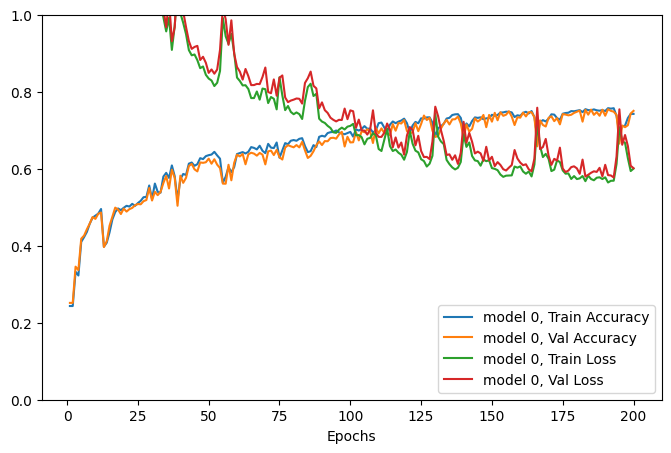

In [2]:
model = lstm(input_size=input_size, hidden_size=int(input_size/2), out_size=5, dropout=0.2) 
T = Trainer(D)
T.setup(model, learning_rate=1e-2, weight_decay=1e-3, batch_size=5000, max_epochs=200)
T.train_model(model)
plot_train([T])
test_accuracy([D], [model])

In [ ]:
# --------- Cells with some scribles ------------

# This function can be used to look at a sliding window 
# Not better performing than just using a split (i.e. no stride==input_size)
def change_input(x, I, S):
    """I is window size, S is stride"""

    # Make a mask used to transform inputs 
    bs = x.shape[0]
    W = x.shape[-1] 
    L = int((W - I) / S + 1)

    mask = np.full((L, W), False)
    mask[0, :I] = True 
    for i in range(1, L):
        mask[i] = np.roll(mask[i-1], shift=S)

    result = np.zeros((bs, L, I))
    x = x * np.ones((1, L, 1))  # multiply by ones to extend shape
    for i in range(bs):
        result[i] = x[i][mask].reshape((L, I))
    return result

In [3]:
# Exploring some reshaping
import numpy as np
x = np.arange(50).reshape((10, 1, 5))
print(x)
res = []
input_size = 5
x = x.reshape(x.shape[0], x.shape[1] * x.shape[2])
print(x)
# for i in range(x.shape[-1] - input_size + 1):
#     res.append(x[:, :, i:i+input_size])
# x = np.concatenate(res, axis=1)
# print("Reshaped:\n", x)
# print(x.shape)

[[[ 0  1  2  3  4]
  [ 5  6  7  8  9]]

 [[10 11 12 13 14]
  [15 16 17 18 19]]

 [[20 21 22 23 24]
  [25 26 27 28 29]]

 [[30 31 32 33 34]
  [35 36 37 38 39]]

 [[40 41 42 43 44]
  [45 46 47 48 49]]]
[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]
 [30 31 32 33 34 35 36 37 38 39]
 [40 41 42 43 44 45 46 47 48 49]]
